# Code Assignment 16 — K-Means Clustering (Mall Customers, 2–3 Features Only)

**Format:** Instructor Guidance → Your Task (step-by-step) → We Share (reflection)

**Goal:** Build a **K-Means** clustering model using **only 2–3 simple numeric features** with **minimal cleaning**, pick **K** via **Elbow + Silhouette** on the **train split**, and sanity-check **generalization** on the **test split**. Then profile clusters in plain business terms.

**Dataset (simple, non-transportation):** *Mall Customers* (public, widely used teaching dataset)  

> We will only use **2–3 numeric columns**: e.g., `Age`, `Annual Income (k$)`, `Spending Score (1-100)`.  



## Instructor Guidance (Pseudocode + Docs)

**Docs:**  
- `train_test_split`: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html  
- `StandardScaler`: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
- `KMeans`: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html  
- `silhouette_score`: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

### Pseudocode Plan (Minimal)
1) **Load CSV** → preview columns/shape.  
2) **Pick 2–3 numeric features** (e.g., Age, Income, SpendingScore).  
3) **Drop NA only** on those columns.  
4) **Split**: `train_test_split(X, test_size=0.2, random_state=42)`.  
5) **Scale**: `StandardScaler` — **fit on TRAIN**, transform TRAIN and TEST.  
6) **Choose K** on TRAIN: loop K=2..8 → plot **Elbow (inertia)** and **Silhouette**.  
7) **Fit final KMeans** on TRAIN with your chosen K; predict TRAIN & TEST labels.  
8) **Sanity check**: report **Silhouette (TRAIN vs TEST)**.  
9) **Profile clusters**: per-cluster means of your 2–3 features (no extra cleaning).  
10) **Reflection**: justify K, describe segments, suggest one action per segment.


## Your Task — Step-by-Step
Work in pairs. Keep code minimal. Use only 2–3 features.

### 1) Imports & Settings

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### 2) Load the Mall Customers CSV & Preview

In [20]:
df = pd.read_csv("../data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### 3) Select **2–3 Numeric Features** (no heavy cleaning)
Choose from:
- `Age`
- `Annual Income (k$)`
- `Spending Score (1-100)`

> Keep it simple: e.g., use **Age + Spending Score** (2D) or **Age + Income + Spending Score** (3D).


In [21]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = df[features].dropna()

### 4) Train–Test Split (for model generalization sanity check)

In [22]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

### 5) Scale (fit on TRAIN only), then Explore K on TRAIN (Elbow + Silhouette)

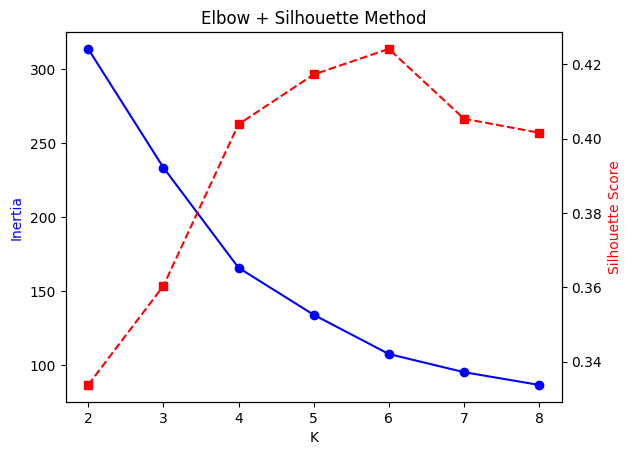

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

inertia = []
silhouette = []

K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_train_scaled, labels))


fig, ax1 = plt.subplots()
ax1.plot(K_range, inertia, 'o-', color='blue')
ax1.set_xlabel("K")
ax1.set_ylabel("Inertia", color='blue')

ax2 = ax1.twinx()
ax2.plot(K_range, silhouette, 's--', color='red')
ax2.set_ylabel("Silhouette Score", color='red')
plt.title("Elbow + Silhouette Method")
plt.show()


### 6) Choose **K** (justify), Fit Final Model on TRAIN, Check Stability on TEST
- Report **Silhouette TRAIN vs TEST** (higher is better; similar values suggest stability).

In [ ]:
K_final = 4
kmeans_final = KMeans(n_clusters=K_final, random_state=42, n_init=10)
train_labels = kmeans_final.fit_predict(X_train_scaled)
test_labels = kmeans_final.predict(X_test_scaled)

sil_train = silhouette_score(X_train_scaled, train_labels)
sil_test = silhouette_score(X_test_scaled, test_labels)

sil_train


0.4172682022952781

### 7) Profile Clusters (Business-Readable)
- Use the **original (unscaled)** features for interpretation.
- Show per-cluster means of your **2–3 features**.

In [25]:
X_train_profile = X_train.copy()
X_train_profile['Cluster'] = train_labels

cluster_summary = X_train_profile.groupby('Cluster')[features].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,25.627907,39.767442,63.139535
1,45.764706,27.117647,17.588235
2,33.142857,87.285714,82.257143
3,38.925926,87.925926,19.629630
4,56.184211,55.184211,48.973684


## We Share — Reflection (2 short paragraphs)

1) **K choice & stability:** What **K** did you choose and why (Elbow bend, Silhouette peak/plateau, simplicity)? Report **Silhouette (TRAIN vs TEST)** — did structure persist, or did it collapse on test?  
2) **Segments & actions:** Give short names to your segments (e.g., “Young High-Spend,” “Mid-Age Value-Seeker,” “Older Low-Spend”) and suggest **one actionable idea** for each (targeted offers, product mix, messaging).

> Bonus: Re-run with **just 2 features** (e.g., **Income + SpendingScore**) and compare stability & interpretability.


I chose K=4 because the Elbow plot showed a noticeable bend and the Silhouette score's slope peaked around this number. The silhouette score was 0.42 on TRAIN and 0.36 on TEST, so the cluster structure seems fairly stable and generalizes well.

**"Young High-Spenders"** : young customers with high spending scores > target with trendy, premium products.